In [1]:
#wt
#lipidomics_metabolomics_transcriptomics(kupffer cells)
#filtering


In [2]:
#import necessary libraries:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests

ent= entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [3]:
#load lipidomics data:
lipidomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/DataMatrix_wtLipidomics_2023_01_30.csv")
#print(lipidomics.shape)
print(lipidomics.shape)
lipidomics

(660, 29)


,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_203,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,...,HFD_HFD_CD_602,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_502,HFD_HFD_HFD_503,HFD_HFD_HFD_504
0,Car(14:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022679,0.012631,0.000000,0.018628,0.000000,0.000000
1,Car(14:1),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016026,0.000000,0.000000,0.000000,0.000000,0.000000
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.041253,0.053345,0.025642,0.062604,...,0.039922,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.044581,0.172271,0.061797
3,Car(16:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.055673,0.027771,0.033463,0.054042,...,0.000000,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.062968,0.038900,0.041276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,1.437870,0.398621,0.430603,0.225338,...,0.502622,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,1.604558,0.116157,0.316657
656,TAG(61:7)_TAGODD,0.431361,0.480428,0.106920,0.450315,0.283981,1.736179,0.411845,0.428490,-0.000249,...,0.184296,0.051279,1.391812,15.206841,1.684688,0.612688,2.817626,2.750158,0.237528,0.137820
657,TAG(61:6)_TAGODD,0.000000,0.000000,0.000000,-0.000248,-0.000269,-0.000306,0.250061,-0.000221,0.000000,...,0.000000,0.000000,-0.000314,2.474071,-0.000295,0.119433,0.000000,0.000000,0.038956,0.028073
658,TAG(61:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051895,0.000000,...,0.000000,0.000000,0.000000,1.317206,0.134132,0.000000,0.000000,0.000000,0.057229,0.066653


In [4]:
#remove features with more than 50% missing values:
data = []
for i in lipidomics.columns:
     #print(lipidomics[i].eq(0).mean())
     if lipidomics[i].eq(0).mean() <= 0.3:
        data.append(lipidomics[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt

(24, 660)


,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
Unnamed: 0,Car(14:2),Car(14:1),Car(14:0),Car(16:2),Car(16:1),Car(16:0),Car(18:2),Car(18:1),Car(18:0),Car(20:2),...,TAG(59:2)_TAGODD,TAG(59:1)_TAGODD,TAG(59:0)_TAGODD,TAG(61:10)_TAGODD,TAG(61:9)_TAGODD,TAG(61:8)_TAGODD,TAG(61:7)_TAGODD,TAG(61:6)_TAGODD,TAG(61:5)_TAGODD,TAG(61:4)_TAGODD
CD_CD_CD_103,0.0,0.0,0.035796,0.0,0.034216,0.101562,0.045423,0.107916,0.077571,0.0,...,0.162319,0.03282,0.0,0.195594,0.245285,0.41463,0.431361,0.0,0.0,0.0
CD_CD_CD_105,0.0,0.0,0.059788,0.0,0.045847,0.134982,0.042569,0.151249,0.109694,0.0,...,0.350367,0.138855,0.127094,0.178552,0.104911,0.576205,0.480428,0.0,0.0,0.0
CD_CD_CD_106,0.0,0.0,0.102324,0.0,0.047364,0.157014,0.080287,0.137623,0.133206,0.015809,...,0.0,0.046702,0.0,0.073797,0.051413,0.189522,0.10692,0.0,0.0,0.0
CD_CD_HFD_200,0.0,0.0,0.067638,0.0,0.036504,0.09636,0.050425,0.114681,0.131625,0.0,...,0.224697,-0.000248,0.0,0.0,0.397482,0.639735,0.450315,-0.000248,0.0,0.0
CD_CD_HFD_201,0.0,0.0,0.034614,0.0,0.050584,0.189367,0.066934,0.244214,0.119176,0.0,...,0.474345,0.139341,0.0,0.0,0.164217,0.447826,0.283981,-0.000269,0.0,0.0
CD_CD_HFD_205,0.0,0.0,0.053345,0.0,0.027771,0.177136,0.046442,0.131215,0.242675,0.0,...,0.543948,0.090513,0.0,0.0,0.231534,0.398621,0.411845,0.250061,0.0,0.0
CD_CD_HFD_206,0.0,0.0,0.025642,0.0,0.033463,0.173237,0.065752,0.17161,0.220315,0.0,...,0.103096,0.021195,0.03459,0.236292,0.206013,0.430603,0.42849,-0.000221,0.051895,0.0
CD_CD_HFD_207,0.0,0.0,0.062604,0.0,0.054042,0.249863,0.091638,0.063861,0.338595,0.0,...,0.168113,0.087839,0.0,0.0,0.117505,0.225338,-0.000249,0.0,0.0,0.0
HFD_CD_CD_800,0.0,0.0,0.042316,0.0,0.053673,0.224876,0.041312,0.256484,0.201164,0.0,...,0.151502,0.105535,0.0,0.0,0.784354,1.86628,1.669939,-0.000279,0.0,0.0


In [5]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(660, 24)

In [6]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.3:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,HFD_CD_CD_800,...,HFD_CD_HFD_703,HFD_HFD_CD_601,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_503,HFD_HFD_HFD_504
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.053345,0.025642,0.062604,0.042316,...,0.024352,0.050808,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.172271,0.061797
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.027771,0.033463,0.054042,0.053673,...,0.032226,0.047815,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.038900,0.041276
5,Car(16:0),0.101562,0.134982,0.157014,0.096360,0.189367,0.177136,0.173237,0.249863,0.224876,...,0.144345,0.296427,0.151589,0.128743,0.169041,0.312758,0.173216,0.206656,0.208344,0.229369
6,Car(18:2),0.045423,0.042569,0.080287,0.050425,0.066934,0.046442,0.065752,0.091638,0.041312,...,0.042143,0.053998,0.045318,0.022009,0.034643,0.089726,0.051369,0.064699,0.050062,0.069832
7,Car(18:1),0.107916,0.151249,0.137623,0.114681,0.244214,0.131215,0.171610,0.063861,0.256484,...,0.140085,0.327171,0.264518,0.111655,0.079305,0.279146,0.188603,0.200502,0.184250,0.228647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,TAG(59:3)_TAGODD,0.074169,0.197051,0.063417,0.146121,0.375943,0.313717,0.204373,0.140151,0.518644,...,0.176050,0.777572,0.332164,0.835389,4.845042,0.397235,0.859992,0.291849,0.123324,0.402113
650,TAG(59:2)_TAGODD,0.162319,0.350367,0.000000,0.224697,0.474345,0.543948,0.103096,0.168113,0.151502,...,0.282322,0.166932,0.000000,0.158944,1.081367,0.290992,0.784703,0.933941,0.421710,0.291262
654,TAG(61:9)_TAGODD,0.245285,0.104911,0.051413,0.397482,0.164217,0.231534,0.206013,0.117505,0.784354,...,0.132957,0.000000,0.000000,0.655594,18.724244,3.054841,0.774482,1.387182,0.000000,0.229220
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,0.398621,0.430603,0.225338,1.866280,...,0.228778,2.170027,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,0.116157,0.316657


In [7]:
#remove 10% of the rows randomly:
lipidomics_remove_rows = lipidomics_remove_rows.sample(frac=0.8)
lipidomics_remove_rows


,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,HFD_CD_CD_800,...,HFD_CD_HFD_703,HFD_HFD_CD_601,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_503,HFD_HFD_HFD_504
491,TAG(56:8)_TAG,49.352624,62.358897,35.732573,216.822869,216.118380,270.707543,81.271381,84.794420,324.438873,...,73.311525,660.159473,66.086512,272.372444,753.570116,965.192056,379.060936,1049.638625,101.123075,98.138686
245,PC(34:2),2286.076934,2673.937881,2632.428294,1799.686326,2075.351210,2240.018854,2296.032555,2173.163019,1052.770119,...,2605.062947,1277.304021,1640.361355,899.296931,1344.293284,1581.527350,1448.500208,2066.047734,2735.127311,2036.632315
392,PS(40:4),30.835825,24.464950,23.216083,22.706981,24.714752,26.273951,23.790114,24.337918,22.852318,...,26.748202,23.733070,20.592446,21.177286,29.804183,37.675560,24.596081,28.648758,28.785825,30.342694
240,PC(32:2),22.746823,23.052770,19.014484,9.339697,9.943264,12.759088,10.815332,11.742308,14.608581,...,10.508341,8.324372,21.080875,13.298365,11.879090,18.064135,9.913503,9.072954,12.707036,12.860794
639,TAG(57:2)_TAGODD,0.228636,0.437593,0.156131,0.366193,1.028823,1.063248,0.634156,0.265433,0.614749,...,0.598277,1.294384,0.224593,0.415639,8.011409,0.416587,1.787138,2.057076,0.484612,1.090373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,DiHexCer(d18:1/18:2),1.295903,1.171536,1.907797,1.059554,1.333401,2.257651,0.986793,0.696329,4.535788,...,1.018530,7.602942,3.567619,5.297646,1.663623,3.180767,4.240688,7.855674,1.047316,1.279712
494,TAG(56:5)_TAG,87.694258,92.178477,52.320271,119.247264,182.631834,228.559269,79.649965,59.175975,886.388339,...,79.033585,959.153731,273.229355,722.844596,477.550506,653.546060,481.087622,620.497915,111.348392,147.846695
60,DAG(30:1),1.120769,1.250652,0.945221,0.596005,0.830241,1.619617,0.705790,1.094675,2.034579,...,0.648364,1.030622,2.100083,2.788309,1.615959,2.448862,1.305259,2.569112,1.200167,0.811684
287,PC-O(40:3),0.832016,0.432406,0.000000,0.886041,1.256282,1.342358,1.132761,1.192891,1.141298,...,1.556016,3.046857,0.000000,0.000000,1.318212,0.868906,1.371711,0.000000,2.792111,1.514173


In [8]:
#lipodomics data:
data_list = []

for i in range(len(lipidomics_remove_rows)):
    row = lipidomics_remove_rows.iloc[i, 1:].T.reset_index()
    row.columns = ['sample', 'value']  
    #print(row)
   
    feature = lipidomics_remove_rows.iloc[i, 0] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    lipid_class = feature.split("(")[0]
    #print(lipid_class)

    row['view'] = "Lipidomics"

    
    
    row['group'] = "group_lipidomics_wt"
    data_list.append(row)

df1_lipidomics = pd.concat(data_list, ignore_index=True)

df1_lipidomics


,sample,value,feature,view,group
0,CD_CD_CD_103,49.352624,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,62.358897,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,35.732573,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,216.822869,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,216.11838,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
8114,HFD_HFD_CD_606,80.725988,CE(18:0),Lipidomics,group_lipidomics_wt
8115,HFD_HFD_HFD_500,51.046636,CE(18:0),Lipidomics,group_lipidomics_wt
8116,HFD_HFD_HFD_501,67.526704,CE(18:0),Lipidomics,group_lipidomics_wt
8117,HFD_HFD_HFD_503,26.004803,CE(18:0),Lipidomics,group_lipidomics_wt


In [9]:
#remove missing values:
final_lipodomics= df1_lipidomics[df1_lipidomics["value"] != 0]
final_lipodomics.head()
final_lipodomics.shape

(7950, 5)

In [10]:
#Normalization of lipidomics data:
#log2:
final_lipodomics["value"] = final_lipodomics["value"].apply(lambda x: np.log2(x + 1))
final_lipodomics

,sample,value,feature,view,group
0,CD_CD_CD_103,5.653995,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,5.985475,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,5.198988,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,7.767012,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,7.762338,TAG(56:8)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
8114,HFD_HFD_CD_606,6.352723,CE(18:0),Lipidomics,group_lipidomics_wt
8115,HFD_HFD_HFD_500,5.701733,CE(18:0),Lipidomics,group_lipidomics_wt
8116,HFD_HFD_HFD_501,6.098594,CE(18:0),Lipidomics,group_lipidomics_wt
8117,HFD_HFD_HFD_503,4.755144,CE(18:0),Lipidomics,group_lipidomics_wt


In [11]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = False)
final_lipodomics.head()

,sample,value,feature,view,group
4965,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
2573,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2569,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2563,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2568,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt


In [12]:
final_lipodomics.describe()

,value
count,7950.000000
mean,3.179103
std,2.824511
min,-0.000447
25%,0.870487
50%,2.287827
75%,4.814052
max,13.894826


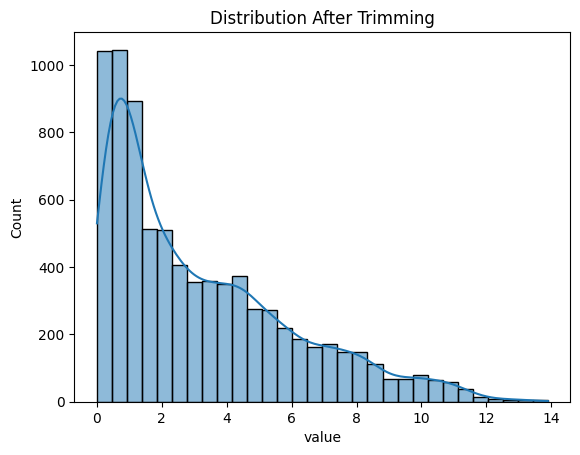

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [14]:
#remove values less than 0.8:
final_lipodomics = final_lipodomics[final_lipodomics["value"] >= 0.6]
final_lipodomics


,sample,value,feature,view,group
4965,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
2573,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2569,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2563,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
2568,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
1058,CD_CD_CD_103,0.602576,MAG(14:1),Lipidomics,group_lipidomics_wt
4763,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
3491,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
3599,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


In [15]:
#remove values greater than 4:
final_lipodomics = final_lipodomics[final_lipodomics["value"] <= 4.6]
final_lipodomics

,sample,value,feature,view,group
2889,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
48,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2773,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
7845,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
2830,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
1058,CD_CD_CD_103,0.602576,MAG(14:1),Lipidomics,group_lipidomics_wt
4763,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
3491,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
3599,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


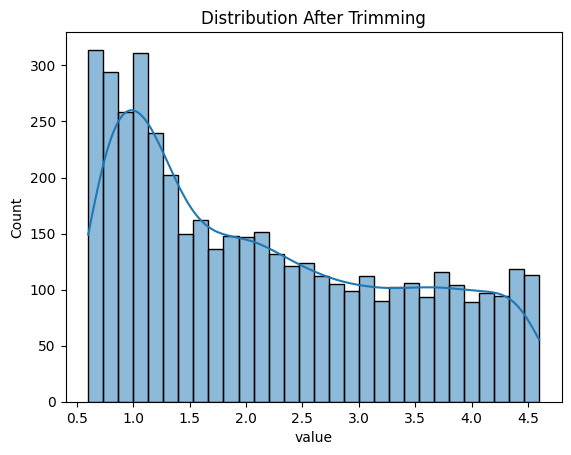

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [17]:
final_lipodomics[:100]

,sample,value,feature,view,group
2889,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
48,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2773,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
7845,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
2830,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
6144,CD_CD_HFD_200,4.481649,HexCer(d18:1/22:0),Lipidomics,group_lipidomics_wt
2770,HFD_CD_CD_803,4.481598,PS(40:7),Lipidomics,group_lipidomics_wt
3371,HFD_CD_HFD_703,4.481397,TAG(48:2)_TAG,Lipidomics,group_lipidomics_wt
6945,HFD_HFD_HFD_504,4.480172,SM(22:1),Lipidomics,group_lipidomics_wt


In [18]:
final_lipodomics.describe()

,value
count,4440.000000
mean,2.177136
std,1.192444
min,0.600684
25%,1.109822
50%,1.935809
75%,3.152149
max,4.598996


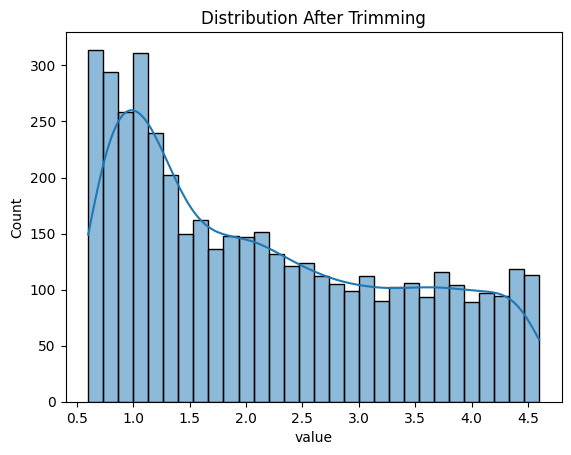

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
#%pip install openpyxl

metabolomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/batch_norm_imput_data.csv",  sep = ";", on_bad_lines='skip')
#print(metabolomics)

metabolomics.head()

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"


In [21]:
#replace nan to 0:
metabolomics = metabolomics.fillna(0)
metabolomics.head()



,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"


In [22]:
#change the , to . in the values:
metabolomics = metabolomics.replace(',', '.', regex=True)
metabolomics.head()

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
1,UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
2,UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
3,UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
4,UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [23]:
df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
df.head()

,30,35,49,50,55,62,71,92,93,98,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
PARENT_SAMPLE_NAME,,,,,,,,,,,,,,,,,,,,,
UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,1.050835059,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,0.886933041,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,0.671903841,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,1.369660158,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,0.73658925,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [24]:
metabolomics_wt = df.T
print(metabolomics_wt)
metabolomics_wt.head()


PARENT_SAMPLE_NAME   UHBO-00909   UHBO-00910   UHBO-00911   UHBO-00912  \
30                  1.263196724   0.96967371  0.989362284  0.953683827   
35                  2.781068393  1.482323505  1.000188589  0.979320902   
49                  1.067288109  0.941553736  0.292503035  1.531404218   
50                    2.3889985   1.14978295  1.191345398   0.94494098   
55                  0.492861356  1.422265125  2.279249698  0.493600748   
...                         ...          ...          ...          ...   
100022009           4.284333484  1.233749778  0.050782213   0.95271482   
100022014           5.217145312  0.859976006  0.422308456  0.923871025   
100022017           2.515704587  2.011541654  0.213165489  0.746680593   
100022041           1.175637572  1.214253515  0.863098939  0.666303058   
100022120           1.121925273  1.597948924   0.51736125  0.947929006   

PARENT_SAMPLE_NAME   UHBO-00913   UHBO-00914   UHBO-00915   UHBO-00916  \
30                  1.264298377  1.52

PARENT_SAMPLE_NAME,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,UHBO-00918,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
30,1.263196724,0.96967371,0.989362284,0.953683827,1.264298377,1.521892378,1.107626961,0.784484584,1.045403431,0.408184449,...,0.966484085,0.704706188,0.637274661,0.860709453,1.010637716,0.622501767,1.202931909,1.932290077,1.042036826,1.25592263
35,2.781068393,1.482323505,1.000188589,0.979320902,0.961779964,1.003336837,0.613250578,0.893691003,1.343643794,0.596898028,...,1.682639491,0.785908748,1.329928437,0.755856123,2.945765775,1.548351739,0.987884442,1.942390731,0.677657312,0.942800003
49,1.067288109,0.941553736,0.292503035,1.531404218,0.632321694,1.063231925,0.801379152,0.292503035,1.61873825,0.292503035,...,0.820281901,1.267627389,0.292503035,0.292503035,1.389261515,0.977672627,0.292503035,2.407070049,1.211839554,0.520981024
50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,0.344042983,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
55,0.492861356,1.422265125,2.279249698,0.493600748,2.490499506,0.315515448,0.587939862,2.457000697,0.737830399,0.975833516,...,1.240138319,2.149398864,1.909033374,1.274364599,0.52261615,0.244998636,1.208780411,0.192843647,2.355077562,0.951534494


In [25]:
#metadata for metabolomics:
#metadata = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/metabolomics_metadata.csv", sep=";")
#metadata.head()

In [26]:
#print(metadata.columns)
#print(metabolomics_wt.columns)


In [27]:
# Replace PARENT_SAMPLE_NAME in metabolomics_wt with CHEMICAL_NAME from metadata
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.columns = metadata["CHEMICAL_NAME"]
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.head()




In [28]:
#metabolomics= metabolomics_wt.T
#metabolomics.head()

In [29]:
#rows is samples 
#columns is features
#metabolomics = metabolomics.T
#metabolomics


In [30]:
#df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
#df.head()

In [31]:
#remove 10% of the rows randomly:
metabolomics_remove_rows = metabolomics_wt.sample(frac=0.8)
metabolomics_remove_rows

PARENT_SAMPLE_NAME,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,UHBO-00918,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
197,0.594209407,1.290361526,1.028643782,0.986138206,1.015245765,0.731060578,0.96875023,1.297480142,1.168086218,0.618782253,...,1.589932347,0.898521065,0.956353384,0.704139398,0.870341061,2.461451256,1.506739497,1.23406777,0.700237778,1.075684072
100002462,1.12568024,1.013126984,1.233206904,1.271768603,1.017915386,1.155348371,1.071418462,1.542323307,0.950691225,0.478613976,...,0.746824375,0.764761197,0.802039922,0.832832567,0.721579084,0.447533997,1.475279922,0.992763868,1.556565905,1.129789169
100001063,15.54973081,0.092453063,0.129704659,8.994327043,0.022353281,2.672614774,0.616857364,0.173692643,13.89813936,0.035199747,...,0.462199927,0.022353281,1,0.463591282,11.23667965,4.918705655,0.852670077,3.08722453,7.534171996,6.54582957
209,0.866720873,1.051623903,1.482857536,1.105378638,1.078687711,0.996933513,1.136430204,0.909879567,1.270140331,0.428796094,...,0.875739073,0.958271258,0.694491198,1.004975777,0.833084458,923.2243197,0.71455773,2.125474517,0.70564656,0.893879052
100005985,0.422327625,1.121381874,1.163750786,0.573399232,2.049496286,0.872995785,0.878669798,1.323303066,0.388038316,0.651121228,...,0.984240221,2.263017298,1.451983731,1.572695517,1.007267624,0.561687867,0.927178585,1,0.808773969,0.887549078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1.062279629,1.035751226,0.850194161,0.959853648,0.929457574,0.902453118,0.872474378,1.125017388,1.044007926,0.745233798,...,1.138916493,0.832773207,1.118424709,1.007367168,1.032921878,0.966615264,0.921162078,0.90208673,0.85023421,1.042176339
100001417,0.430984405,1.699405693,4.977419307,1.159301131,0.946482566,0.84682068,0.430984405,2.306150111,0.430984405,0.430984405,...,3.245483117,0.430984405,0.430984405,1.319347007,0.430984405,0.68112963,0.430984405,0.430984405,0.430984405,0.430984405
100021990,1.8750472,1.075742431,0.172945218,0.505519646,1.540451493,0.876968526,0.963642893,0.742697852,1.049910042,0.420581506,...,1.113735812,1.060216343,1.02999341,1.181985444,0.513212353,2.009506675,2.293659255,0.954069582,0.95880441,1.717357826
100003415,1.446174454,0.671309441,1.45150141,0.981424688,0.95714912,1.173942068,1.175366556,0.666871973,1.321065992,0.499132831,...,0.73115444,1.040358827,0.921017587,0.681573321,1.144948675,0.895674821,1.07125529,0.877621404,1.090152346,0.931339976


In [32]:
data_list = []
 
for i in range(len(metabolomics_remove_rows)):
    row = metabolomics_remove_rows.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(metabolomics_remove_rows.index[i])
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "metabolomics"

    
    
    row['group'] = "group_metabolomics_wt"
    data_list.append(row)

df1_metabolomics = pd.concat(data_list, ignore_index=True)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,0.594209407,197,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.290361526,197,metabolomics,group_metabolomics_wt
2,UHBO-00911,1.028643782,197,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.986138206,197,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.015245765,197,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
30613,UHBO-00946,1.37329649,302,metabolomics,group_metabolomics_wt
30614,UHBO-00947,1.496624235,302,metabolomics,group_metabolomics_wt
30615,UHBO-00948,1.49866162,302,metabolomics,group_metabolomics_wt
30616,UHBO-00949,1.003846112,302,metabolomics,group_metabolomics_wt


In [33]:
# Ensure the 'sample' column is of string type before concatenation
df1_metabolomics["feature"] = "chem_id_" + df1_metabolomics["feature"].astype(str)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,0.594209407,chem_id_197,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.290361526,chem_id_197,metabolomics,group_metabolomics_wt
2,UHBO-00911,1.028643782,chem_id_197,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.986138206,chem_id_197,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.015245765,chem_id_197,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
30613,UHBO-00946,1.37329649,chem_id_302,metabolomics,group_metabolomics_wt
30614,UHBO-00947,1.496624235,chem_id_302,metabolomics,group_metabolomics_wt
30615,UHBO-00948,1.49866162,chem_id_302,metabolomics,group_metabolomics_wt
30616,UHBO-00949,1.003846112,chem_id_302,metabolomics,group_metabolomics_wt


In [34]:
#remove missing values:
final_metabolomics= df1_metabolomics[df1_metabolomics["value"] != 0]
final_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,0.594209407,chem_id_197,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.290361526,chem_id_197,metabolomics,group_metabolomics_wt
2,UHBO-00911,1.028643782,chem_id_197,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.986138206,chem_id_197,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.015245765,chem_id_197,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
30613,UHBO-00946,1.37329649,chem_id_302,metabolomics,group_metabolomics_wt
30614,UHBO-00947,1.496624235,chem_id_302,metabolomics,group_metabolomics_wt
30615,UHBO-00948,1.49866162,chem_id_302,metabolomics,group_metabolomics_wt
30616,UHBO-00949,1.003846112,chem_id_302,metabolomics,group_metabolomics_wt


In [35]:

# Verify the changes
# Convert 'value' column to float
final_metabolomics['value'] = final_metabolomics['value'].astype(float)

# Verify the changes
print(final_metabolomics.dtypes)

sample      object
value      float64
feature     object
view        object
group       object
dtype: object


In [36]:
final_metabolomics

,sample,value,feature,view,group
0,UHBO-00909,0.594209,chem_id_197,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.290362,chem_id_197,metabolomics,group_metabolomics_wt
2,UHBO-00911,1.028644,chem_id_197,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.986138,chem_id_197,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.015246,chem_id_197,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
30613,UHBO-00946,1.373296,chem_id_302,metabolomics,group_metabolomics_wt
30614,UHBO-00947,1.496624,chem_id_302,metabolomics,group_metabolomics_wt
30615,UHBO-00948,1.498662,chem_id_302,metabolomics,group_metabolomics_wt
30616,UHBO-00949,1.003846,chem_id_302,metabolomics,group_metabolomics_wt


In [37]:
final_metabolomics.describe()


,value
count,30618.000000
mean,1.349614
std,10.513047
min,0.001631
25%,0.669091
50%,0.975464
75%,1.277092
max,969.771986


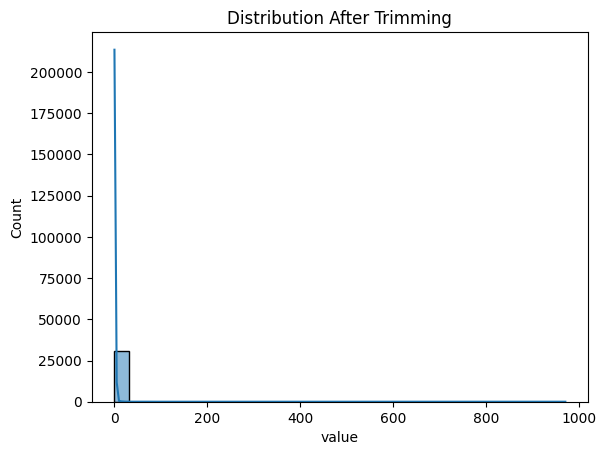

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [39]:
#remove values less than 0.7:
final_metabolomics = final_metabolomics[final_metabolomics["value"] >= 0.7]
final_metabolomics

#remove values greater than 1.3:
final_metabolomics = final_metabolomics[final_metabolomics["value"] <= 1.3]
final_metabolomics


,sample,value,feature,view,group
1,UHBO-00910,1.290362,chem_id_197,metabolomics,group_metabolomics_wt
2,UHBO-00911,1.028644,chem_id_197,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.986138,chem_id_197,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.015246,chem_id_197,metabolomics,group_metabolomics_wt
5,UHBO-00914,0.731061,chem_id_197,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
30591,UHBO-00924,1.026406,chem_id_302,metabolomics,group_metabolomics_wt
30593,UHBO-00926,1.182415,chem_id_302,metabolomics,group_metabolomics_wt
30609,UHBO-00942,0.737383,chem_id_302,metabolomics,group_metabolomics_wt
30612,UHBO-00945,1.130357,chem_id_302,metabolomics,group_metabolomics_wt


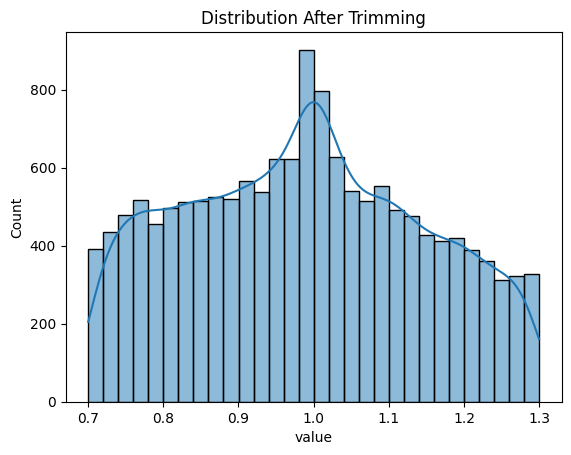

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [41]:
#transcriptomics 

In [42]:
#load transcriptomics HC data by identifier
transcriptomics_kc=pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/CountMatrix_KupfferCells_WT_RNASeq_kallistoImport (1).csv")
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,ENSMUSG00000000001.4,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028.14,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,ENSMUSG00000000031.16,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,ENSMUSG00000000037.16,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,ENSMUSG00000115846.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53460,ENSMUSG00000115847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53461,ENSMUSG00000115848.1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
53462,ENSMUSG00000115849.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
gene_kc= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_KupfferCells_RNAseq.csv")
print(gene_kc.columns)  # Print the column names to identify the correct column name
gene_kc.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [44]:
#merge symbol to the unamed column
transcriptomics_kc['Unnamed: 0'] =  gene_kc['SYMBOL'] 
transcriptomics_kc.head()

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,H19,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,Scml2,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13


In [45]:
trans_kc_lenghts = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/Indentifires_kc - Copy.csv")
trans_kc_lenghts.head()

,Unnamed: 0.1,Unnamed: 0,gene_length
0,0,ENSMUSG00000000001,38866.0
1,1,ENSMUSG00000000003,15722.0
2,2,ENSMUSG00000000028,31540.0
3,3,ENSMUSG00000000031,4695.0
4,4,ENSMUSG00000000037,175688.0


In [46]:
kc_lenghts = trans_kc_lenghts["gene_length"]
kc_lenghts.head()

0     38866.0
1     15722.0
2     31540.0
3      4695.0
4    175688.0
Name: gene_length, dtype: float64

In [47]:
#add gene length to the transcriptomics data
kc_lenghts.reset_index(drop=True, inplace=True)
transcriptomics_kc["gene_length"] = kc_lenghts
transcriptomics_kc.head()
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5954,5979,5980,5981,5982,6024,6025,6026,6027,gene_length
0,Gnai3,103,223,38,150,130,233,164,265,354,...,904,607,1221,2636,1029,1005,655,1642,1125,38866.0
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15722.0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,62,3,37,214,54,89,114,29,200,31540.0
3,H19,0,0,0,0,0,0,0,0,0,...,0,1,61,0,0,0,0,0,0,4695.0
4,Scml2,0,0,2,0,0,3,0,0,0,...,2,0,2,2,0,0,0,0,13,175688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
53460,AC109172.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380.0
53461,AC114008.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1346.0
53462,AC156016.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354.0


In [48]:
#TPM normalization:
from bioinfokit.analys import norm

# Set 'Unnamed: 0' as the index
transcriptomics_kc.set_index('Unnamed: 0', inplace=True)

nm = norm()
nm.tpm(transcriptomics_kc, gl='gene_length')
tpm_df_kc = nm.tpm_norm
tpm_df_kc.head()
tpm_df_kc.shape

(49417, 30)

In [49]:
#remove % of features with 0 values:
df_reset = tpm_df_kc.reset_index(drop=False)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.63:
        data.append(df_reset[i])
df_hepatocyte_1 = pd.DataFrame(data)
print(df_hepatocyte_1.shape)

(24, 49417)


In [50]:
df= df_hepatocyte_1.T
df

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.8373,2.964545,3.091528,2.931694,2.455149,2.98873,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
1,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45,0.0,0.0,0.0,0.0,0.485021,0.0,0.0,0.800448,0.974896,...,0.0,0.739982,0.030278,0.322846,1.275573,0.948394,0.225458,0.149231,0.092644,0.573155
3,H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0678,3.575606,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2,0.0,0.00506,0.0,0.008082,0.0,0.0,0.0,0.004871,0.0,...,0.0,0.004285,0.0,0.003133,0.00214,0.0,0.0,0.0,0.0,0.006688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,AC154323.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49413,AC109172.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.284387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49414,AC114008.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362606,...,1.175731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49415,AC156016.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
5,Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
6,Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
7,Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
8,Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49369,AC160336.1,746.761663,346.199943,477.221908,284.083721,309.463327,350.014163,287.776998,494.971297,356.413513,...,1525.809438,915.589755,291.441435,588.947532,482.273175,1213.872815,121.085333,81.458546,399.301040,296.474498
49382,AC166369.3,0.000000,35.951960,9.616012,0.000000,22.336882,2.346601,2.729048,33.560832,25.121100,...,73.696462,3.690547,11.703048,12.141372,1.843118,4.073033,1.566634,0.708362,3.704367,0.886143
49384,CT009530.1,0.913820,0.375013,0.270207,0.028521,0.137300,0.115393,0.111833,0.850953,0.147061,...,4.005451,0.771292,0.268562,0.580460,0.487159,0.968063,0.072223,0.064690,0.388608,0.092598
49401,AC137871.4,0.000000,0.000000,0.000000,0.000000,0.119355,0.058514,0.045367,0.026152,0.000000,...,0.096720,0.391114,0.136185,0.067279,0.022980,0.067710,0.004883,0.012617,0.043107,0.022097


In [52]:
df =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df.head()

,5820,5821,5823,5824,5827,5828,5859,5860,5861,5946,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,5.175092,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,0.834545,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,2.621084,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,1.816693,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,80.266140,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743


In [53]:
#log2 transformation:
#tpm_df_kc = np.log2(df + 1)
#tpm_df_kc

In [54]:
#remove 10% of the rows randomly:
transcriptomics_remove_rows = df.sample(frac=0.8)
transcriptomics_remove_rows


,5820,5821,5823,5824,5827,5828,5859,5860,5861,5946,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Hnf1aos1,0.000000,0.091141,0.019154,0.016174,0.044492,0.114515,0.006342,0.043869,0.000000,0.000000,...,0.054082,0.102915,0.032635,0.018810,0.083520,0.018930,0.172018,0.094534,0.017217,0.040155
Gm45520,2.636440,19.268834,2.208773,5.595442,4.810053,2.829792,1.462662,25.294617,5.289397,4.913125,...,26.505505,8.900945,3.763423,10.303220,1.666978,0.545746,0.551023,0.650836,1.886125,1.469338
C1s1,0.074246,2.515881,13.155840,3.742443,0.758569,0.717223,7.028197,2.528795,4.224986,0.000000,...,0.000000,1.472655,0.370944,1.168256,0.031296,0.000000,5.420107,1.199375,0.067094,2.505304
Mia3,3.116989,1.316662,2.347639,2.716230,2.056283,2.935695,3.225193,1.029845,2.326711,5.924053,...,4.138351,3.458415,2.519356,3.783010,2.614709,6.319743,1.745442,0.408937,2.742116,1.805137
Gm7424,0.990006,5.920048,0.000000,2.101137,0.722487,3.719141,0.823864,0.949835,1.083390,3.074868,...,10.538521,0.000000,2.826396,3.054433,3.547132,1.229595,0.443387,0.320768,0.670980,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr510,0.000000,2.314486,0.437758,0.000000,0.000000,0.000000,0.676400,2.228069,1.016542,1.875341,...,3.708100,0.686032,0.580125,0.788141,0.097890,1.297941,0.208014,0.010749,0.052465,0.141192
Zfp942,1.482304,0.338030,0.000000,0.853143,0.275023,0.701125,0.470420,0.204887,0.178709,0.499406,...,1.203482,1.325329,0.726232,0.682120,0.211805,1.435382,0.285801,0.125593,0.652730,0.022912
CT025566.1,0.851141,0.954311,0.869059,0.564505,1.436399,1.484538,0.774706,1.224906,0.582141,1.520050,...,5.285182,1.302080,0.607486,0.886274,0.583009,0.462491,0.247776,0.192057,0.504755,0.334206


In [55]:
#transcriptomics KC data:

#view2_1= {"ENSMUSG" : "transcriptomics_KC"}

data_list = []
 
for i in range(len(transcriptomics_remove_rows)):
    row = transcriptomics_remove_rows.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = transcriptomics_remove_rows.index[i] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_KC"

    
    
    row['group'] = "group_KC_wt"
    data_list.append(row)


final_trans_kc = pd.concat(data_list, ignore_index=True)
final_trans_kc

,sample,value,feature,view,group
0,5820,0.000000,Hnf1aos1,transcriptomics_KC,group_KC_wt
1,5821,0.091141,Hnf1aos1,transcriptomics_KC,group_KC_wt
2,5823,0.019154,Hnf1aos1,transcriptomics_KC,group_KC_wt
3,5824,0.016174,Hnf1aos1,transcriptomics_KC,group_KC_wt
4,5827,0.044492,Hnf1aos1,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
271349,5982,10.675206,Naa40,transcriptomics_KC,group_KC_wt
271350,6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
271351,6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
271352,6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


In [56]:
#add ID + all samples columns, like id_30
final_trans_kc["sample"] = "ID_" + final_trans_kc["sample"] 
final_trans_kc


,sample,value,feature,view,group
0,ID_5820,0.000000,Hnf1aos1,transcriptomics_KC,group_KC_wt
1,ID_5821,0.091141,Hnf1aos1,transcriptomics_KC,group_KC_wt
2,ID_5823,0.019154,Hnf1aos1,transcriptomics_KC,group_KC_wt
3,ID_5824,0.016174,Hnf1aos1,transcriptomics_KC,group_KC_wt
4,ID_5827,0.044492,Hnf1aos1,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
271349,ID_5982,10.675206,Naa40,transcriptomics_KC,group_KC_wt
271350,ID_6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
271351,ID_6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
271352,ID_6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


In [57]:
#remove missing values:
final_trans_kc= final_trans_kc[final_trans_kc["value"] != 0]
final_trans_kc

,sample,value,feature,view,group
1,ID_5821,0.091141,Hnf1aos1,transcriptomics_KC,group_KC_wt
2,ID_5823,0.019154,Hnf1aos1,transcriptomics_KC,group_KC_wt
3,ID_5824,0.016174,Hnf1aos1,transcriptomics_KC,group_KC_wt
4,ID_5827,0.044492,Hnf1aos1,transcriptomics_KC,group_KC_wt
5,ID_5828,0.114515,Hnf1aos1,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
271349,ID_5982,10.675206,Naa40,transcriptomics_KC,group_KC_wt
271350,ID_6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
271351,ID_6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
271352,ID_6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


In [58]:
final_trans_kc['value'].describe()

count    261598.000000
mean         73.293577
std        1576.700321
min           0.000045
25%           0.363248
50%           1.723550
75%           7.598794
max      147727.118329
Name: value, dtype: float64

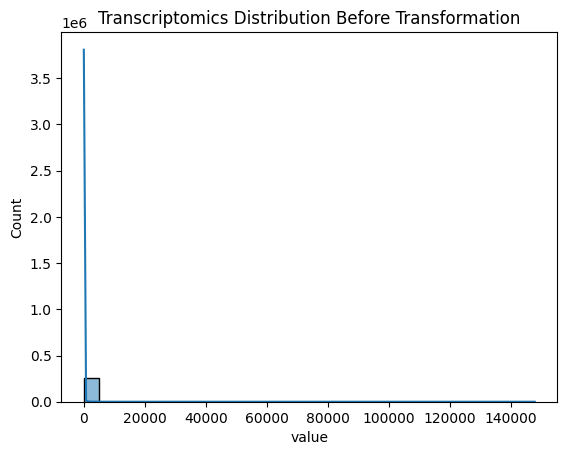

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()


In [60]:
#remove values less than 0.3:

final_trans_kc = final_trans_kc[final_trans_kc["value"] >= 0]
final_trans_kc

#remove values greater than 4:
final_trans_kc = final_trans_kc[final_trans_kc["value"] <= 7.5]
final_trans_kc


,sample,value,feature,view,group
1,ID_5821,0.091141,Hnf1aos1,transcriptomics_KC,group_KC_wt
2,ID_5823,0.019154,Hnf1aos1,transcriptomics_KC,group_KC_wt
3,ID_5824,0.016174,Hnf1aos1,transcriptomics_KC,group_KC_wt
4,ID_5827,0.044492,Hnf1aos1,transcriptomics_KC,group_KC_wt
5,ID_5828,0.114515,Hnf1aos1,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
271346,ID_5979,4.267558,Naa40,transcriptomics_KC,group_KC_wt
271350,ID_6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
271351,ID_6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
271352,ID_6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


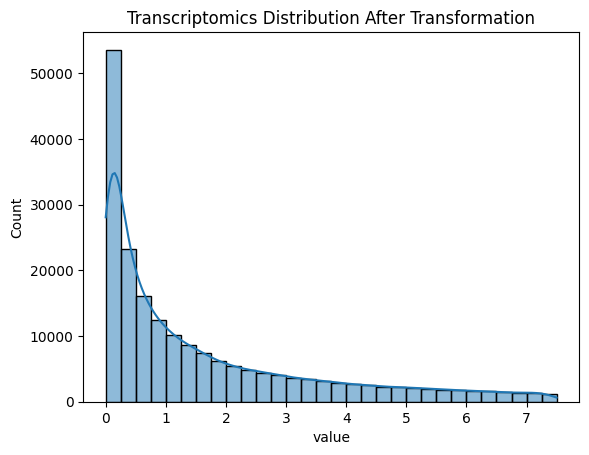

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution After Transformation")
plt.show()


In [62]:
final_trans_kc.describe()

,value
count,195654.000000
mean,1.617831
std,1.851527
min,0.000045
25%,0.211830
50%,0.841830
75%,2.434473
max,7.499442


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [63]:
merged_df = pd.concat([final_lipodomics, final_metabolomics, final_trans_kc], ignore_index=True)
merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
215145,ID_5979,4.267558,Naa40,transcriptomics_KC,group_KC_wt
215146,ID_6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
215147,ID_6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
215148,ID_6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


In [64]:
merged_df['value'].describe()

count    215150.000000
mean          1.585201
std           1.783776
min           0.000045
25%           0.251752
50%           0.917097
75%           2.278551
max           7.499442
Name: value, dtype: float64

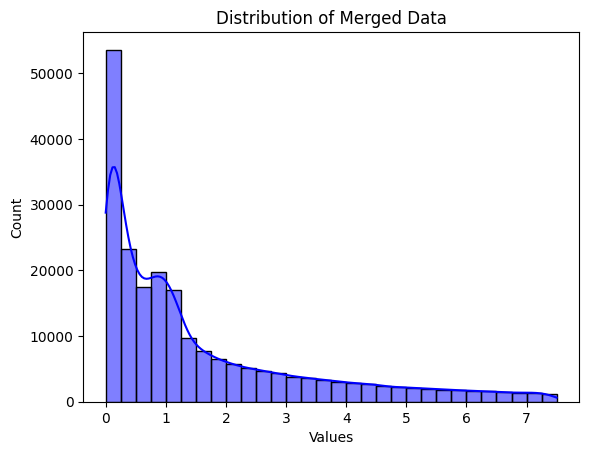

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(merged_df["value"], kde=True, bins=30, color='blue')

plt.title("Distribution of Merged Data")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()


In [66]:
merged_df.describe()

,value
count,215150.000000
mean,1.585201
std,1.783776
min,0.000045
25%,0.251752
50%,0.917097
75%,2.278551
max,7.499442


In [67]:
#set data options:

ent.set_data_options(scale_views = True)  

Scaling views to unit variance...



In [68]:
merged_df = merged_df.drop_duplicates(subset=['group', 'view', 'feature', 'sample'], keep='first')

merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
215145,ID_5979,4.267558,Naa40,transcriptomics_KC,group_KC_wt
215146,ID_6024,0.180241,Naa40,transcriptomics_KC,group_KC_wt
215147,ID_6025,1.109690,Naa40,transcriptomics_KC,group_KC_wt
215148,ID_6026,1.714490,Naa40,transcriptomics_KC,group_KC_wt


In [69]:
# Set the data for MOFA+
ent.set_data_df(merged_df)



No data found for group='group_KC_wt' and view='Lipidomics'...
No data found for group='group_KC_wt' and view='metabolomics'...
Loaded group='group_KC_wt' view='transcriptomics_KC' with N=23 samples and D=11006 features...
Loaded group='group_lipidomics_wt' view='Lipidomics' with N=23 samples and D=273 features...
No data found for group='group_lipidomics_wt' and view='metabolomics'...
No data found for group='group_lipidomics_wt' and view='transcriptomics_KC'...
No data found for group='group_metabolomics_wt' and view='Lipidomics'...
Loaded group='group_metabolomics_wt' view='metabolomics' with N=42 samples and D=727 features...
No data found for group='group_metabolomics_wt' and view='transcriptomics_KC'...




In [70]:
#set model options
ent.set_model_options(
    factors= 10,
    spikeslab_weights=True,
    ard_weights=True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Lipidomics): gaussian
- View 1 (metabolomics): gaussian
- View 2 (transcriptomics_KC): gaussian




In [71]:
#set training options
ent.set_train_options(
    convergence_mode="fast",
    dropR2=0.001,
    gpu_mode=False,
    seed=1
    )

In [72]:
# Convert object columns to strings

ent.build()
ent.run()

ent.save("s_filtering_20%_wt_mofa_model.hdf5")



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -2096823.85 

Iteration 1: time=0.57, ELBO=-381287.56, deltaELBO=1715536.286 (81.81594692%), Factors=9
Iteration 2: time=0.60, ELBO=-299694.69, deltaELBO=81592.870 (3.89126012%), Factors=9
Iteration 3: time=0.44, ELBO=-276706.97, deltaELBO=22987.723 (1.09631160%), Factors=9
Iteration 4: time=0.40, ELBO=-268364.62, deltaELBO=8342.346 (0.39785632%), Factors=9
Iteration 5: time=0.45, ELBO=-264428.23, deltaELBO=3936.388 (0.18773099%), Factors=9
Iteration 6: time=0.89, ELBO=-262263.86, deltaELBO=2164.376 (0.10322162%), Factors=9
Iteration 7: time=0.66, ELBO=-260942.24, deltaELBO=1321.615 (0.06302936%), Factors=9
Iteration 8: time=0.83, ELBO=-260047.43, deltaELBO=894.812 (0.04267465%), Factors=9
Iteration 9: time=0.43, ELBO=-259364.41, deltaELBO=683.021 (0.03257406%), Factors=9
Iteration 10: time=0.43, ELBO=-258777.32, deltaELBO=587.093 (0.02799916%), F